## Import packages

In [1]:
import os
import sys
sys.path.append(os.path.join(".."))

# Import teaching utils
import numpy as np
import utils.classifier_utils as clf_util

# Import sklearn metrics
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Fetch data

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
sorted(set(y))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Depending on the versions of ```pandas``` and ```sklearn``` that you're using, you may need to expressly convert these to ```numpy``` arrays.

In [4]:
X = np.array(X)
y = np.array(y)

__Predifine classes and number of classes__

In [5]:
classes = sorted(set(y))
nclasses = len(classes)

In [8]:
print(classes)
print(nclasses)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
10


__Plot random sample__

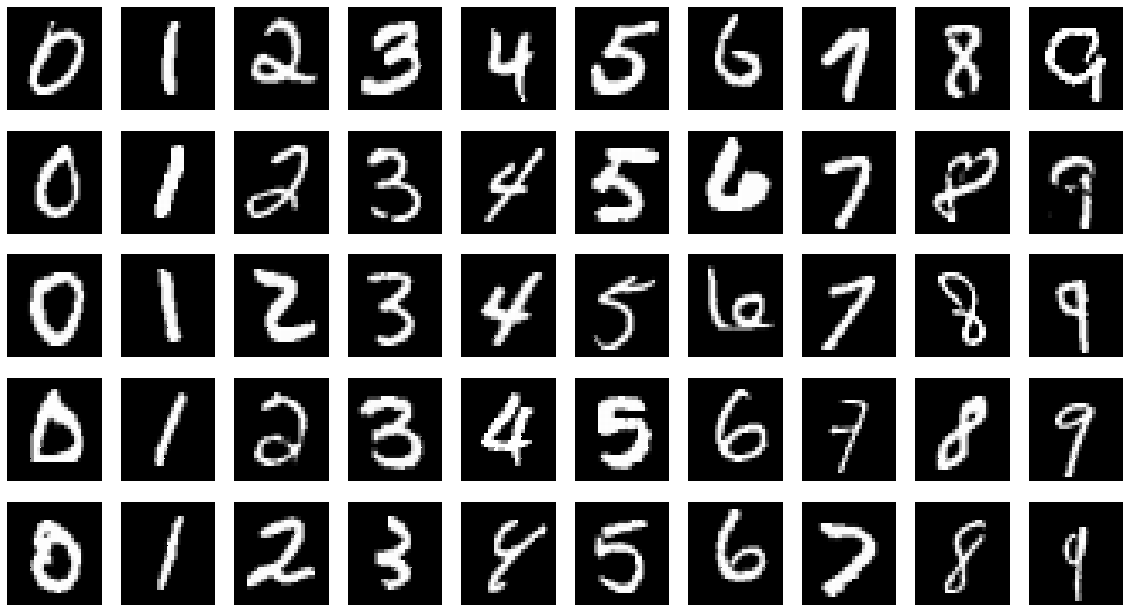

In [9]:
clf_util.plot_sample(X, y, classes, 5)

## Create training and test dataset

In [19]:
# X is labels, y is labels
# We get training data and test data as well as the corresponding labels

X_train, X_test, y_train, y_test = train_test_split(X, # all data
                                                    y, # all labels
                                                    random_state=9, # seed for random split between training and test data & labels
                                                    train_size=50000, # use floats as percentages when using full dataset to split training / test
                                                    test_size=20000)

We should also scale the features

In [20]:
#scaling the features
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

## Train a logistic regression model

In [21]:
# clf = classifier / model etc
clf = LogisticRegression(penalty='none', 
                         tol=0.1, 
                         solver='saga',
                         multi_class='multinomial').fit(X_train_scaled, y_train)

In [22]:
#to check the shape of the coefficient matrix
clf.coef_.shape
# for each class we have 784 values / weights

(10, 784)

In [23]:
clf.coef_[0]
# shows weights for class 0, i.e.
# how important every pixel is for classifying this class

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.90818896e-08, -1.95058620e-07,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.03908392e-09, -1.60153039e-07, -1.05628385e-06, -2.13627711e-06,
       -1.15651206e-05, -9.17582025e-05, -1.35567504e-03, -9.40252922e-04,
       -1.23585866e-04, -1.41077220e-03, -4.81588935e-04, -2.02116795e-03,
       -3.93517545e-03, -3.07280677e-03, -6.15135951e-03, -2.18433944e-03,
       -6.36153440e-04, -2.68322809e-04, -2.32275642e-05, -1.90750032e-08,
        0.00000000e+00,  

## Interpreting the coefficients

We can plot the coefficients for our model, showing which 'features' are most informative when it comes to predicting each class

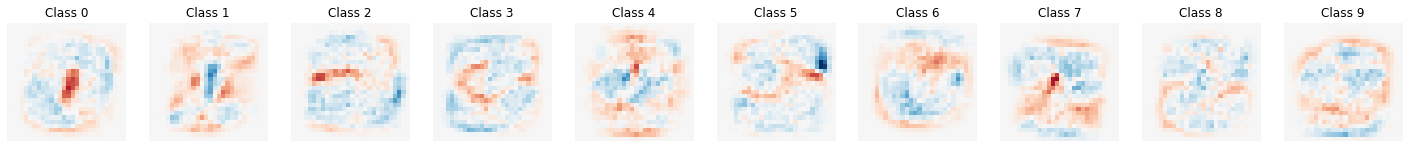

In [24]:
clf_util.plot_coefs(clf.coef_, nclasses)

## Individual predictions

We can then use this model to predict the class of an individual data point.

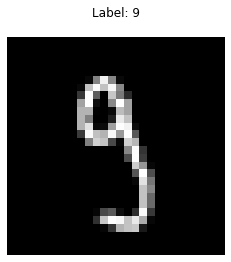

In [35]:
clf_util.plot_individual(X_test_scaled, y_test, 30)

We can compute the conditional probability for each class and then plot the probability distribution.

## Show the distribution of probabilities

I think that this is class 5


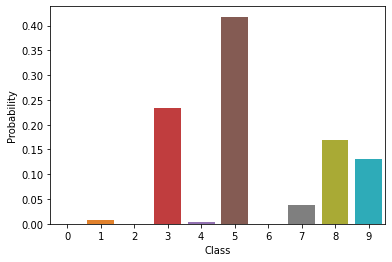

In [34]:
clf_util.plot_probs(X_test_scaled, 30, clf, classes)

We can find the class with the highest probability. 

If this matches the actual label for the first test sample, then our prediction is correct.

## Accuracy

We can calculate predictions for all data the scaled test data.

In [37]:
y_pred = clf.predict(X_test_scaled)

In [41]:
y_pred[:10]

array(['1', '5', '9', '7', '9', '2', '8', '7', '3', '8'], dtype=object)

We then calculate metrics for accuracy based on comparing the predicted labels with the actual labels.

In [42]:
#method 2
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.92235


In [43]:
cm = metrics.classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1997
           1       0.95      0.98      0.96      2266
           2       0.91      0.91      0.91      1967
           3       0.90      0.90      0.90      2062
           4       0.92      0.93      0.93      1939
           5       0.89      0.87      0.88      1777
           6       0.94      0.95      0.95      1989
           7       0.92      0.94      0.93      1993
           8       0.91      0.88      0.89      1940
           9       0.91      0.89      0.90      2070

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



This can be visualised using a confusion matrix

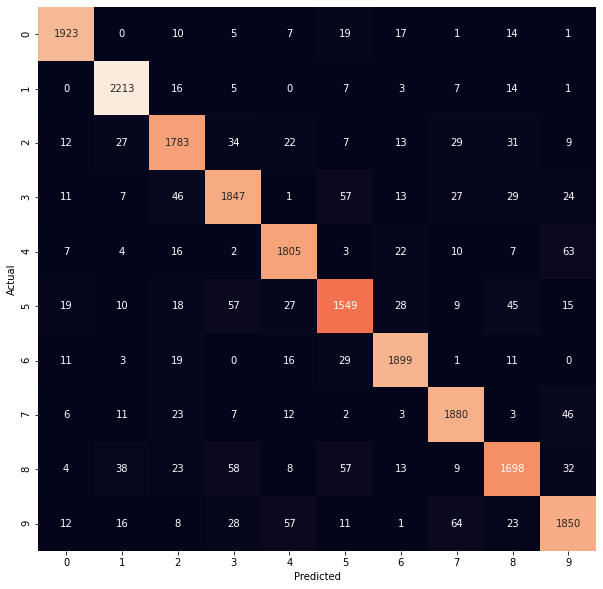

In [44]:
clf_util.plot_cm(y_test, y_pred, normalized=False)

We can also normalize the confusion matrix to show percentages instead of raw values

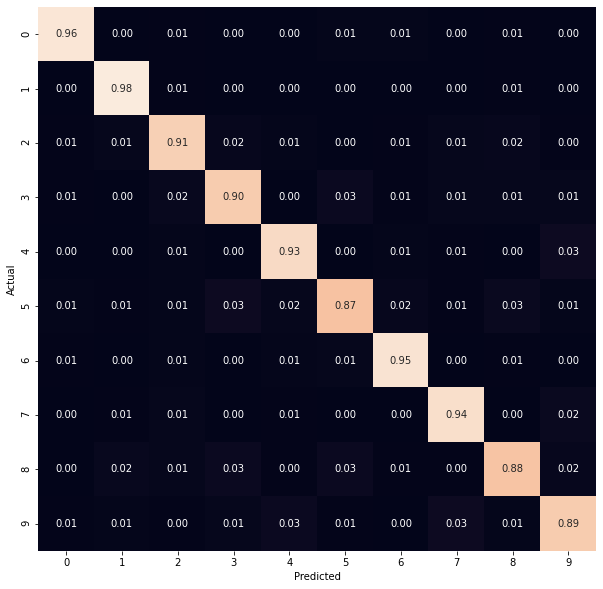

In [45]:
clf_util.plot_cm(y_test, y_pred, normalized=True)

## Test on new data

In [46]:
import cv2
import matplotlib.pyplot as plt

In [50]:
test_image = cv2.imread("../data/cf_test/test.png")

Use bitwise not to invert regular grayscale

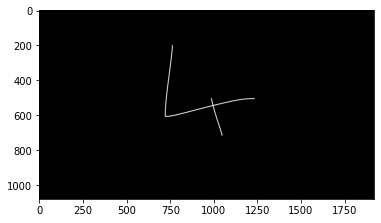

In [51]:
gray = cv2.bitwise_not(cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY))
plt.imshow(gray, cmap=plt.cm.gray)

Resize down to 28x28 image

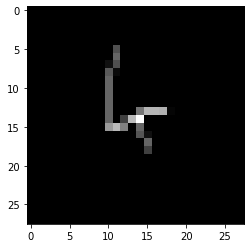

In [52]:
compressed = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
plt.imshow(compressed, cmap=plt.cm.gray)

I think that this is class 4


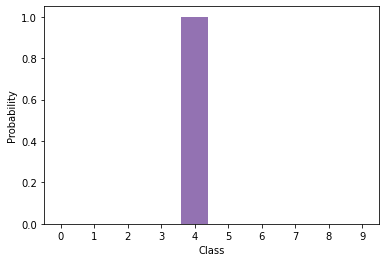

In [53]:
clf_util.predict_unseen(compressed, clf, classes)

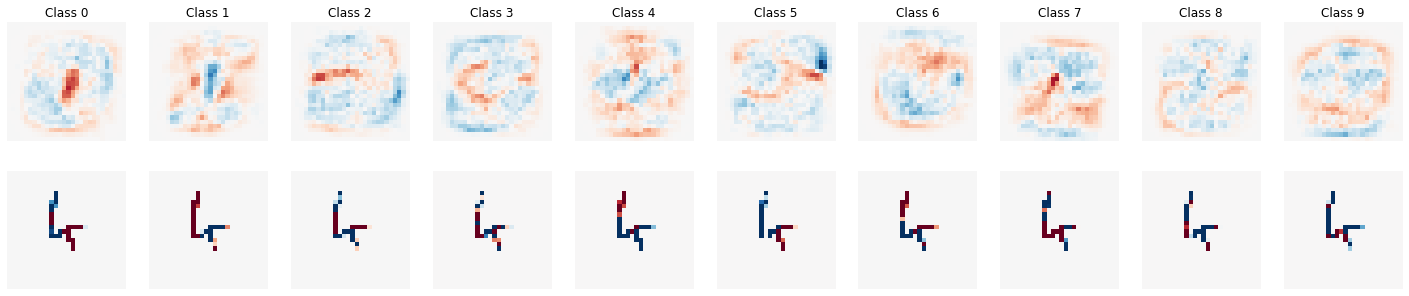

In [54]:
clf_util.prediction_coefficients(compressed, clf, classes)